### Imports

In [11]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Inspecting the Data

In [12]:
(bodyfat:=
 pl.read_csv("./data/bodyfat.csv")
 )

shape: (252, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …       ┆ …   ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 1.0736  ┆ 11.0    ┆ 70  ┆ 134.25 ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 1.0236  ┆ 33.6    ┆ 72  ┆ 201.0  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 1.0328  ┆ 29.3    ┆ 72  ┆ 186.75 ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 1.0399  ┆ 26.0    ┆ 72  ┆ 190.75 ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 1.0271  ┆ 31.9    ┆ 74  ┆ 207.5  ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

In [16]:
bodyfat.columns

['density',
 'bodyfat',
 'age',
 'weight',
 'height',
 'neck',
 'chest',
 'abdomen',
 'hip',
 'thigh',
 'knee',
 'ankle',
 'biceps',
 'forearm',
 'wrist']

### Dropping Density

In [17]:
bodyfat = bodyfat.drop('density')
display(bodyfat.head())

shape: (5, 14)
┌─────────┬─────┬────────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ bodyfat ┆ age ┆ weight ┆ height ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ --- ┆ ---    ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ i64 ┆ f64    ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════╪════════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 12.3    ┆ 23  ┆ 154.25 ┆ 67.75  ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 6.1     ┆ 22  ┆ 173.25 ┆ 72.25  ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 25.3    ┆ 22  ┆ 154.0  ┆ 66.25  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 10.4    ┆ 26  ┆ 184.75 ┆ 72.25  ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 28.7    ┆ 24  ┆ 184.25 ┆ 71.25  ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
└─────────┴─────┴────────┴────────┴───┴───────┴────────┴─────────┴───────┘

### Stacking the Predictors

In [37]:
(predictors :=
 bodyfat
 .unpivot(index='bodyfat',
          variable_name='predictor',
          value_name='label')
 .to_pandas()
)

bodyfat predictor  label
0        12.3       age   23.0
1         6.1       age   22.0
2        25.3       age   22.0
3        10.4       age   26.0
4        28.7       age   24.0
...       ...       ...    ...
3271     11.0     wrist   18.5
3272     33.6     wrist   20.1
3273     29.3     wrist   18.0
3274     26.0     wrist   19.8
3275     31.9     wrist   20.9

[3276 rows x 3 columns]

### Visualizing the Predictors without and with a Smoother
  1. Without a smoother
  2. With a smoother

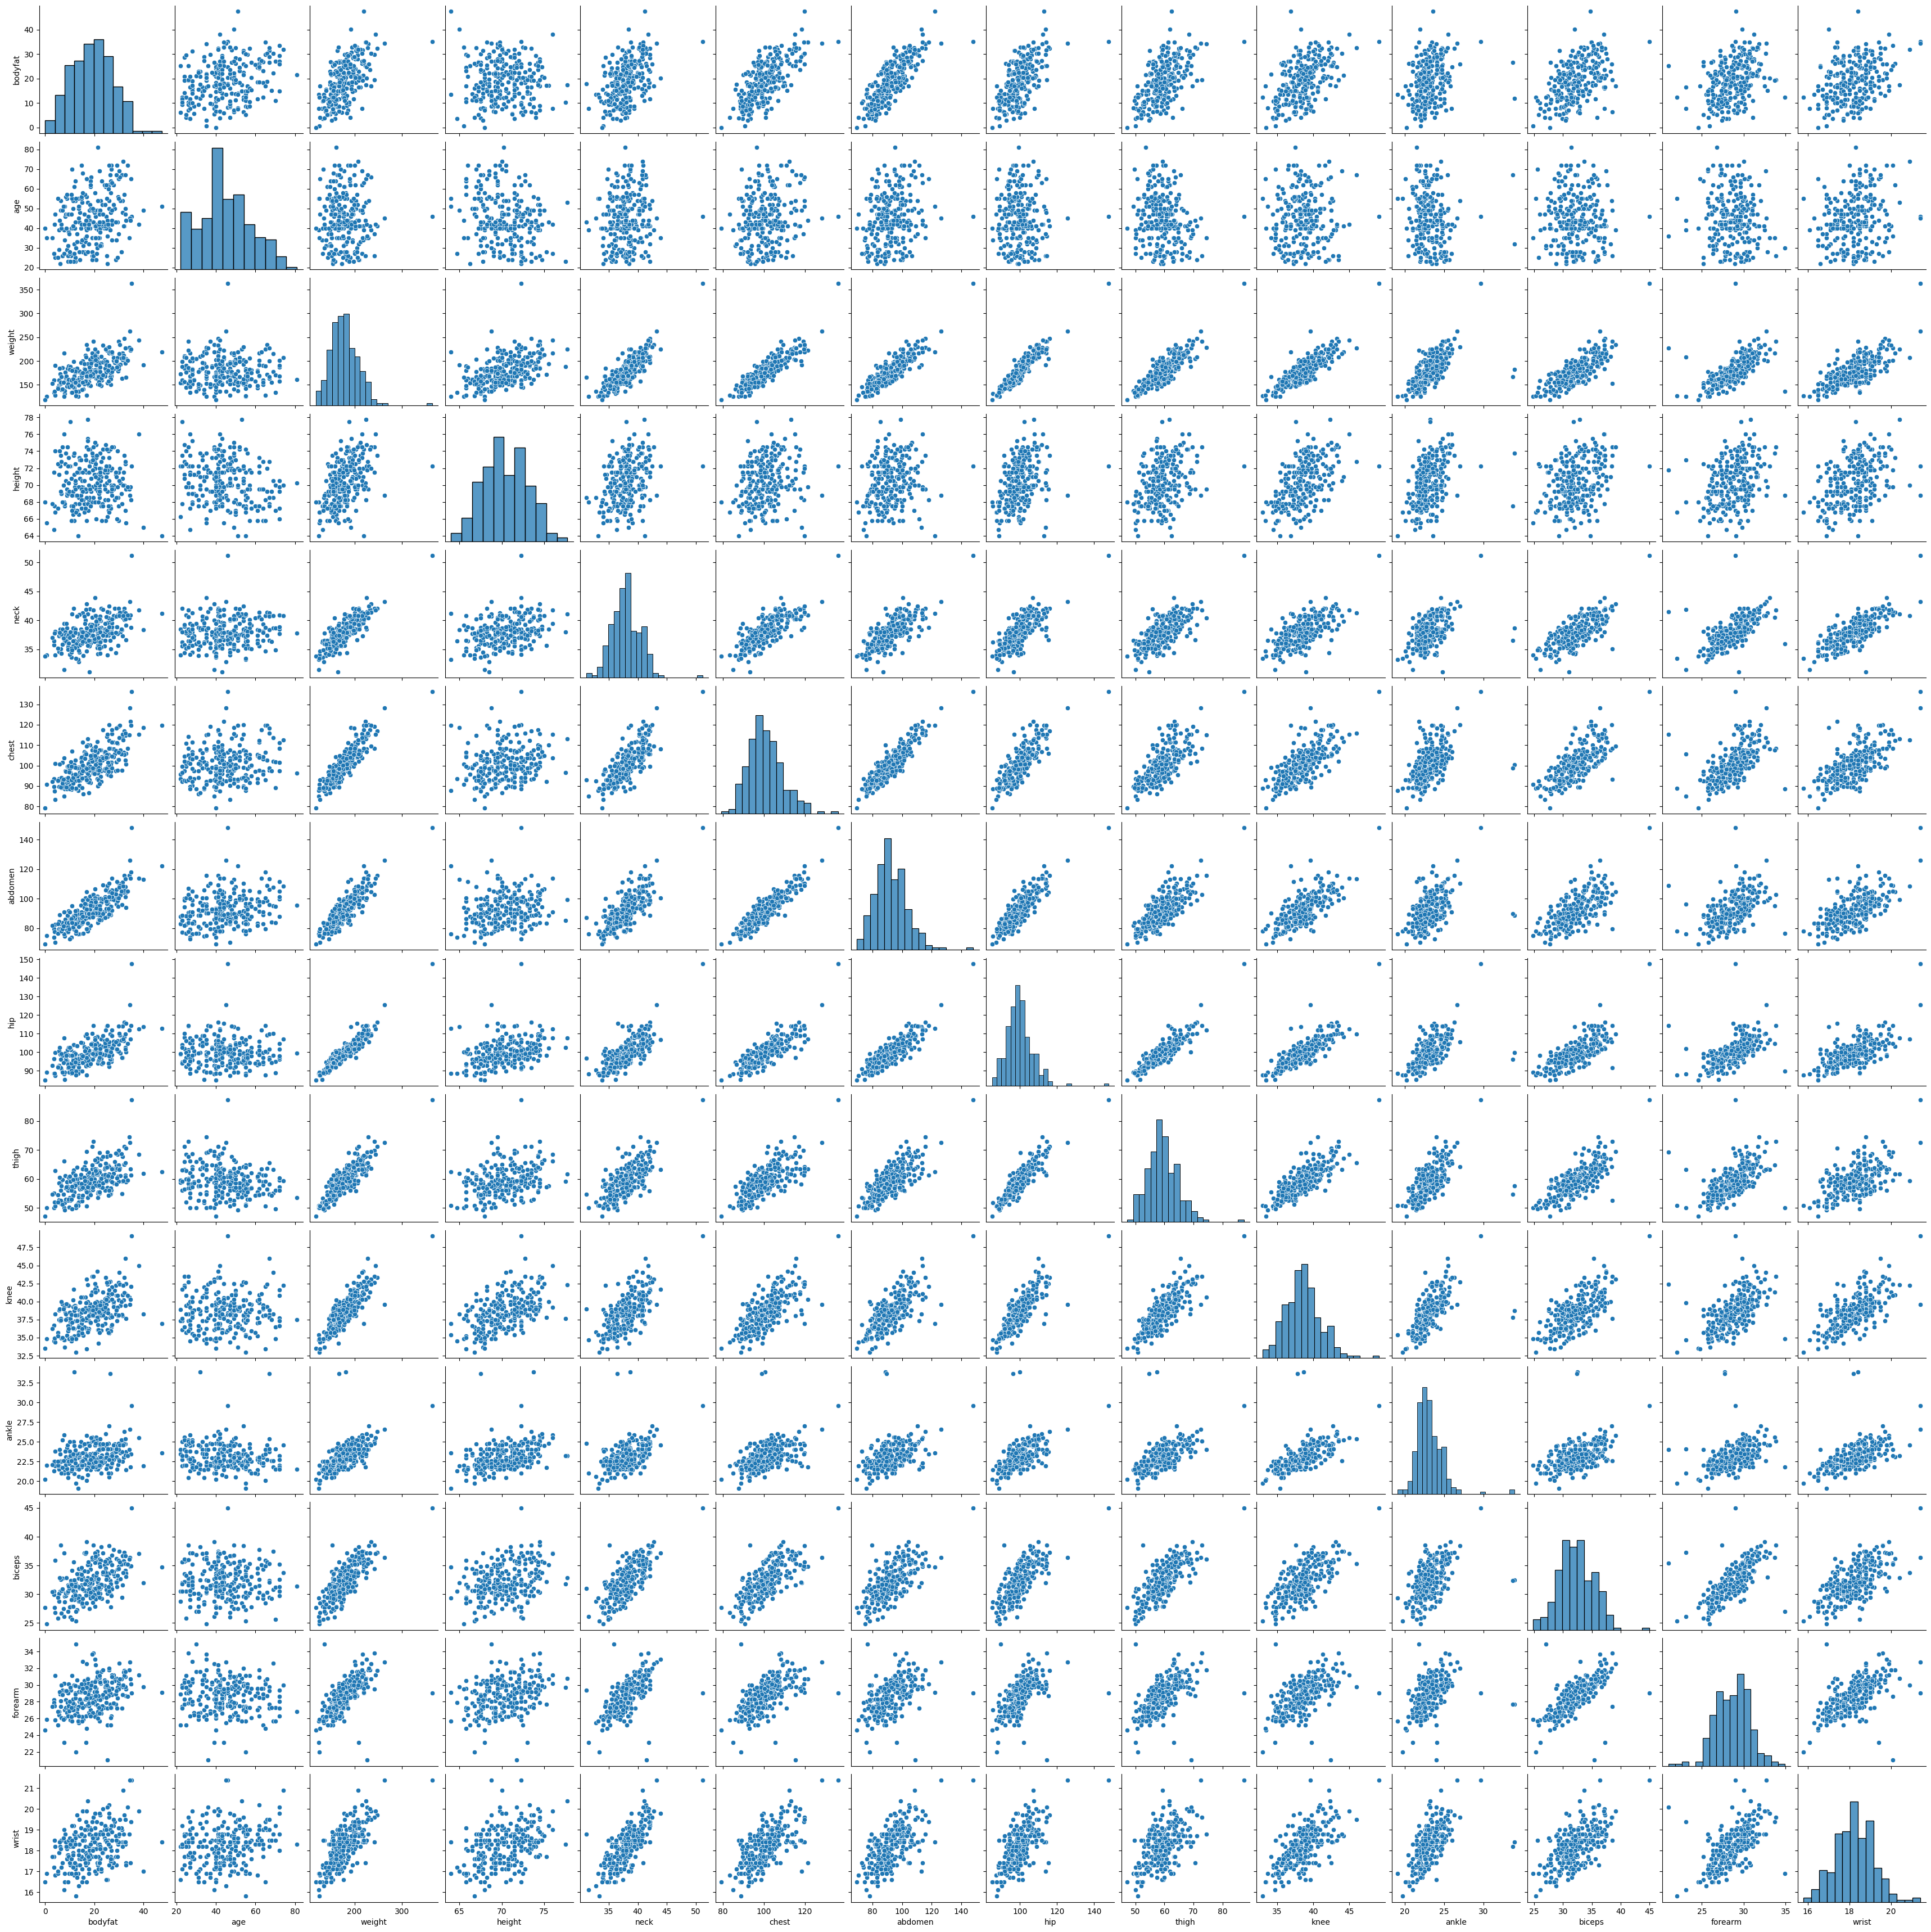

In [41]:
sns.pairplot(bodyfat.to_pandas())
# without a smoother

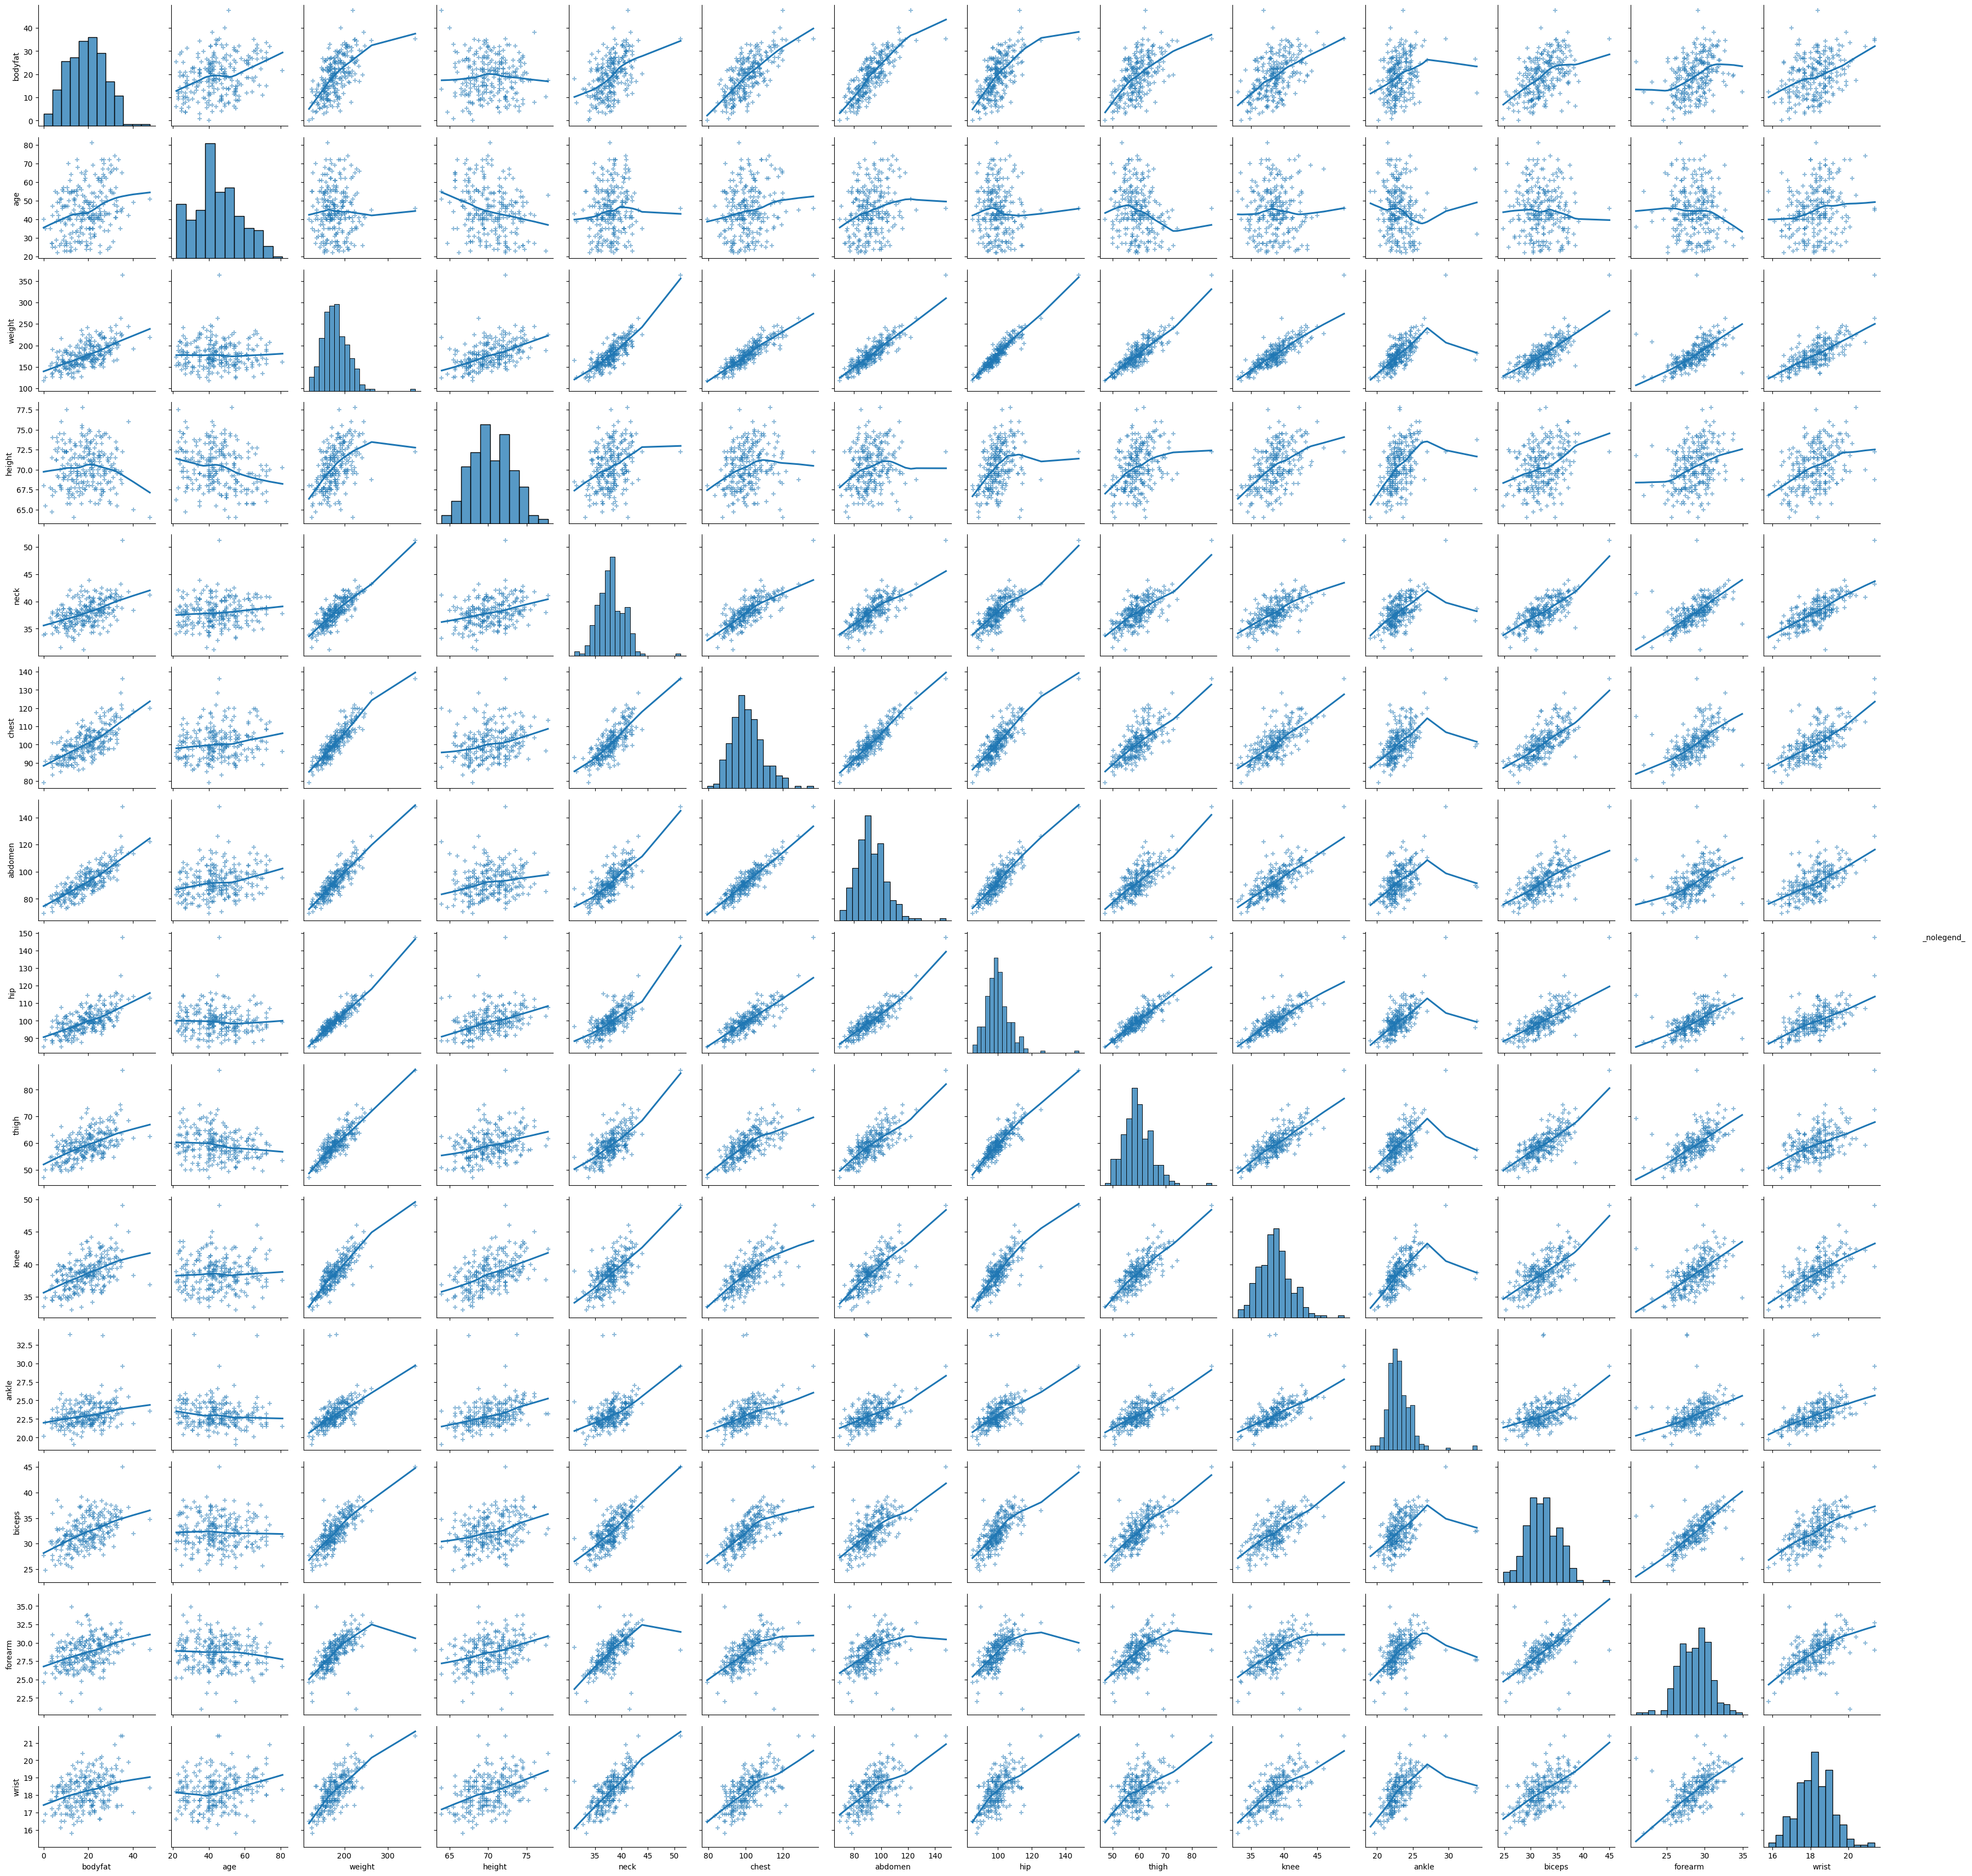

In [42]:
g = sns.PairGrid(bodyfat.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()
# with a smoother

### OLS Model for Summary

In [36]:
model = sm.OLS(y, X)
model_results = model.fit()
display(model_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.50
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           9.71e-64
Time:                        03:46:13   Log-Likelihood:                -718.50
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3532     22.186     -0.962      0.337     -65.060      22.353
age            0.0646      0.032      2.006      0.046       0.001       0.128
weight        -0.0964      0.062     -1.558      0.120      -0.218       0.025
height        -0.0439      0.179     -0.246      0.806      -0.396       0.308
neck          -0.4755      0.236     -2.018      0.045      -0.940      -0.011
chest         -0.0172      0.103     -0.166      0.868      -0.221       0.186
abdomen        0.9550      0.090     10.592      0.000       0.777       1.133
hip           -0.1886      0.145     -1.302      0.194      -0.474       0.097
thigh          0.2483      0.146      1.699      0.091      -0.040       0.536
knee           0.0139      0.248      0.056      0.955      -0.474       0.502
ankle          0.1779      0.223      0.799      0.425      -0.261       0.616
biceps         0.1823      0.172      1.057      0.292      -0.158       0.522
forearm        0.4557      0.199      2.287      0.023       0.063       0.848
wrist         -1.6545      0.533     -3.103      0.002      -2.705      -0.604
==============================================================================
Omnibus:                        4.529   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.878
Skew:                          -0.019   Prob(JB):                        0.237
Kurtosis:                       2.478   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary

The OLS regression model explains approximately 74.9% of the variance in 'bodyfat', with an Adjusted R-squared of 0.735, indicating a good fit. The overall model is statistically significant, as shown by a high F-statistic and a very low p-value. Notably, abdomen (strong positive coefficient = 0.9550) and wrist (strong negative coefficient = -1.6545) were identified as highly significant predictors of bodyfat, alongside age, neck, and forearm.

The visualization shows that most body measurements like your weight and the size of your chest or abdomen have a very clear and direct link to your body fat percentage. Many of these measurements are also closely related to each other, which means they often tell the same story about a person's body type. While most factors follow a predictable pattern, things like age and height do not show as strong of a connection to body fat as the other measurements do.